In [4]:
import pandas as pd
import plotly.graph_objects as go

In [3]:
cpi = pd.read_csv("cpi.csv")
cpi.head()

,Year,Midwest,Northeast,South,West,National
0,2000.0,168.3,179.4,167.2,174.8,172.2
1,2001.0,172.8,184.4,171.1,181.2,177.1
2,2002.0,174.9,188.2,173.3,184.7,179.9
3,2003.0,178.3,193.5,177.3,188.6,184.0
4,2004.0,182.6,200.2,181.8,193.0,188.9


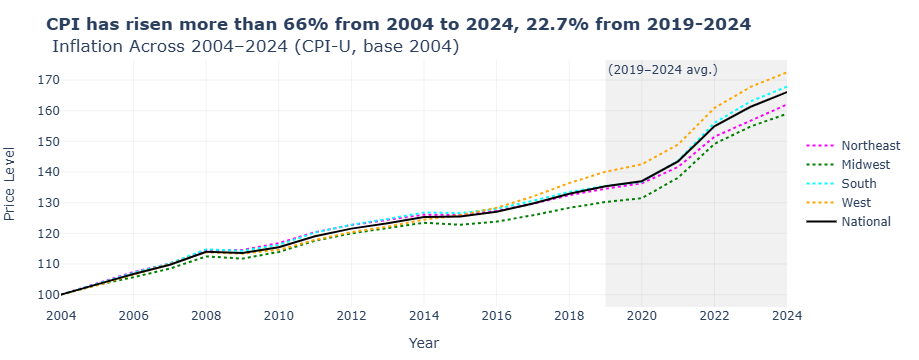

In [42]:
timeframe = cpi[(cpi['Year'] >= 2004) & (cpi['Year'] <= 2024)]

# Build figure

fig = go.Figure()

colors = {
    "Northeast": "magenta",
    "Midwest": "green",
    "South": "cyan",
    "West": "orange",
    "National": "black"
}

for region in colors.keys():
    if region == "National":
        fig.add_trace(
        go.Scatter(
            x=timeframe['Year'],
            y=timeframe[region] / timeframe.loc[timeframe['Year'] == 2004, region].iloc[0] * 100,
            mode="lines",
            name=region,
            line=dict(width=2, color=colors[region]),
        )
        )
    else:
        fig.add_trace(
        go.Scatter(
            x=timeframe['Year'],
            y=timeframe[region] / timeframe.loc[timeframe['Year'] == 2004, region].iloc[0] * 100,
            mode="lines",
            name=region,
            line=dict(width=2, dash='dot', color=colors[region]),
        )
        )


# Shaded region for recent/COVID years 

fig.add_vrect(
    x0=2019,
    x1=2024,
    fillcolor="lightgray",
    opacity=0.3,
    layer="below",
    line_width=0,
    annotation_text="(2019–2024 avg.)",
    annotation_position="top left",
)

# Layout styling

fig.update_layout(
    title="<b>CPI has risen more than 66% from 2004 to 2024, 22.7% from 2019-2024</b> <br> Inflation Across 2004–2024 (CPI-U, base 2004)",
    xaxis_title="Year",
    yaxis_title="Price Level",
    template="plotly_white",
    legend=dict(
        x=1.02,
        y=0.5,
        xanchor="left",
        yanchor="middle",
        borderwidth=0,
    ),
    margin=dict(l=60, r=120, t=60, b=50),
)

fig.update_xaxes(
    showgrid=True,
    gridwidth=1,
    gridcolor="rgba(0,0,0,0.05)"
)

fig.update_xaxes(
    tickmode="linear",
    tick0=2004,
    dtick=2   # or 1 if you want every year
)

fig.update_yaxes(
    showgrid=True,
    gridwidth=1,
    gridcolor="rgba(0,0,0,0.05)",
    tickmode='linear',
    tick0=100,
    dtick=10
)

# Show figure

fig.show()


In [37]:
# Average Annual Inflation Rate
avg = 0
for year in range(2005, 2025):
    avg += (cpi.loc[cpi['Year'] == year, 'National'].iloc[0] / cpi.loc[cpi['Year'] == (year - 1), 'National'].iloc[0]) -1
avg = avg / len(range(2005,2025)) * 100
avg

2.5832189269621004

In [38]:
# Average Annual Inflation Rate from 2019-2024 (5 year changes)
avg = 0
for year in range(2020, 2025):
    avg += (cpi.loc[cpi['Year'] == year, 'National'].iloc[0] / cpi.loc[cpi['Year'] == (year - 1), 'National'].iloc[0]) -1
avg = avg / len(range(2020,2025)) * 100
avg

4.200065648149405